[Working with JSON, Arrays, and Structs in BigQuery](https://www.cloudskillsboost.google/focuses/3696?parent=catalog)

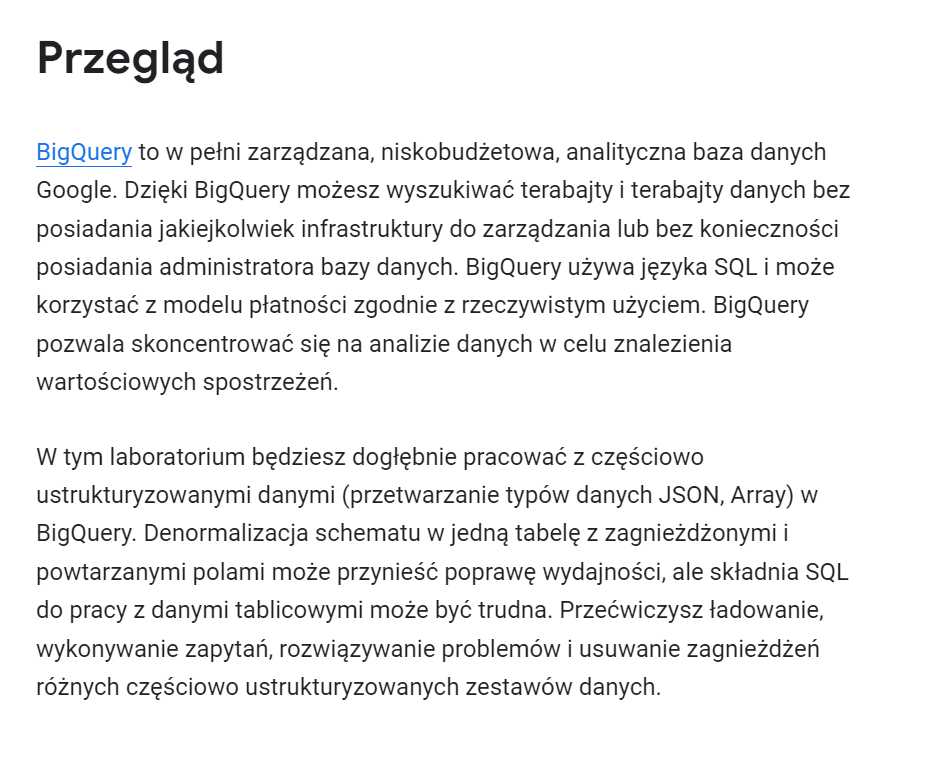

# Array "mode": "REPEATED"

In [ ]:
# fruit_store

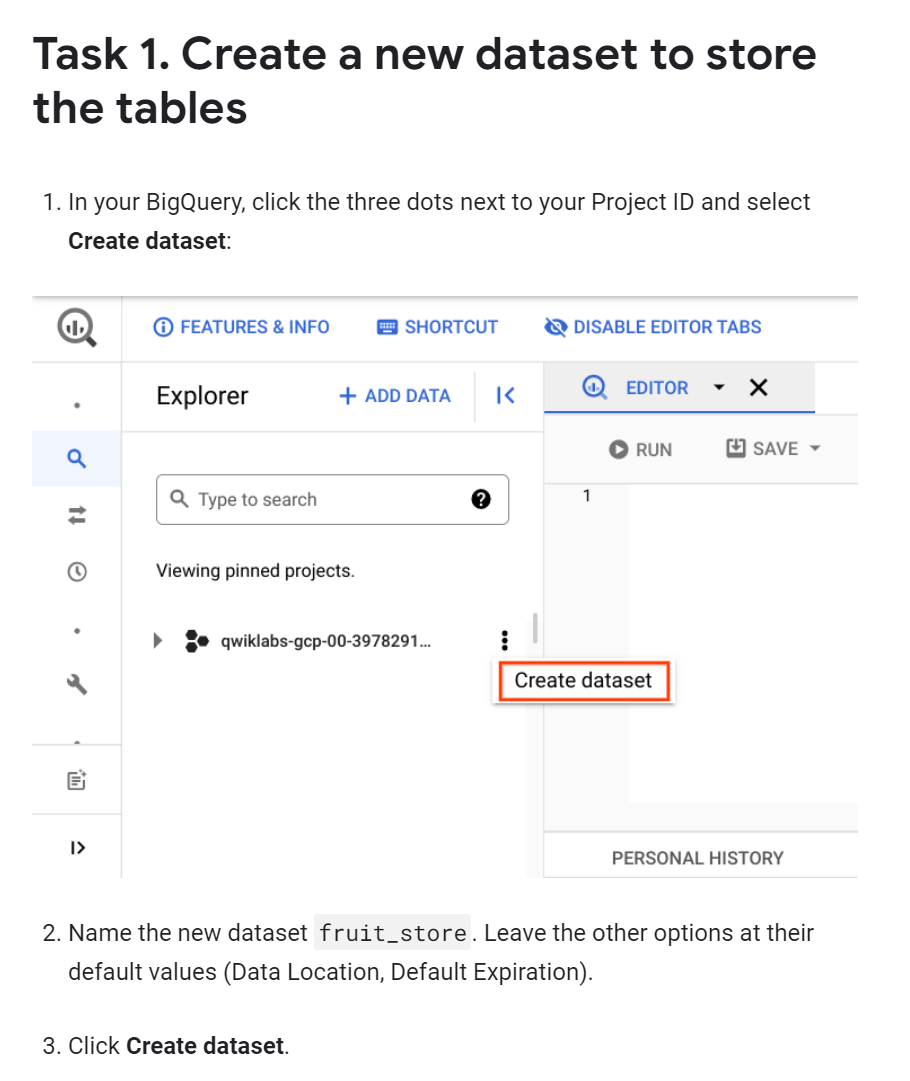

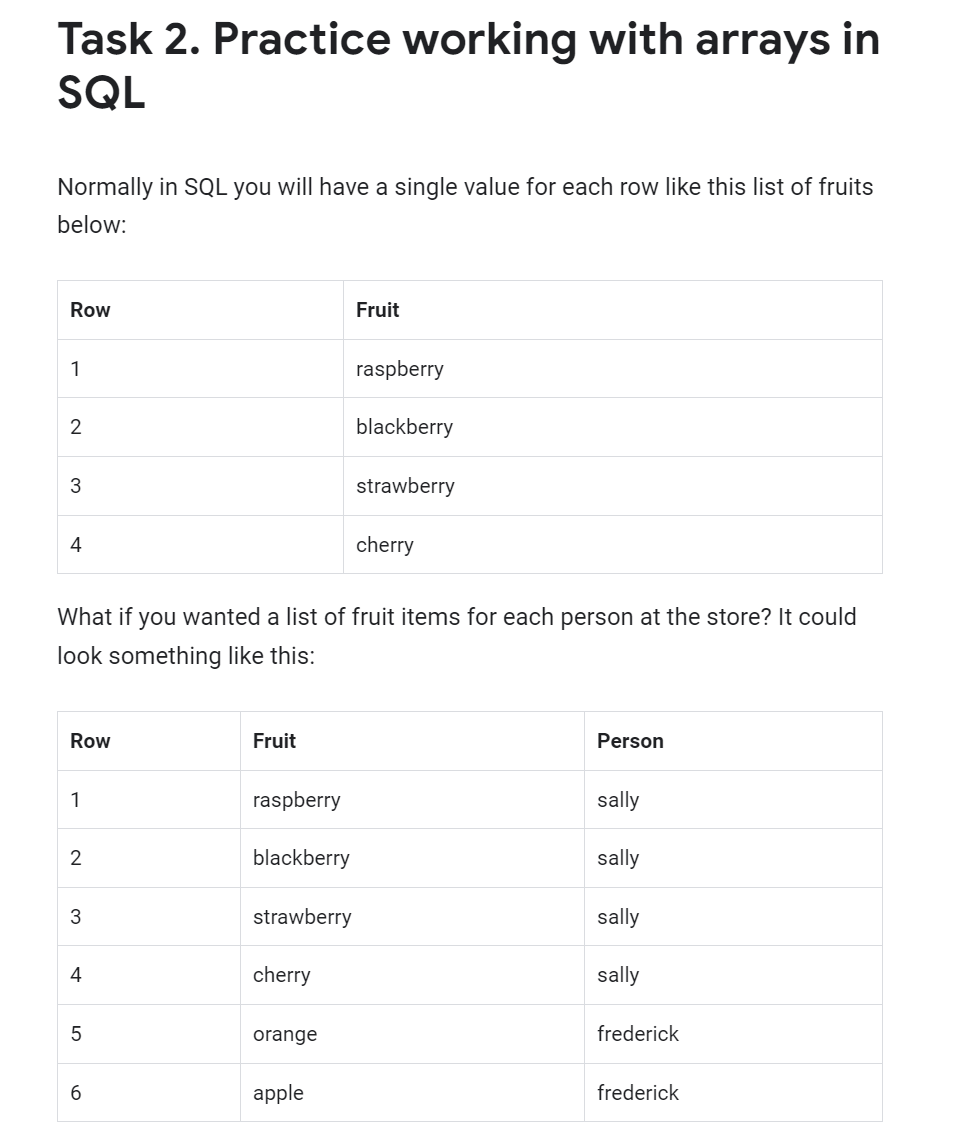

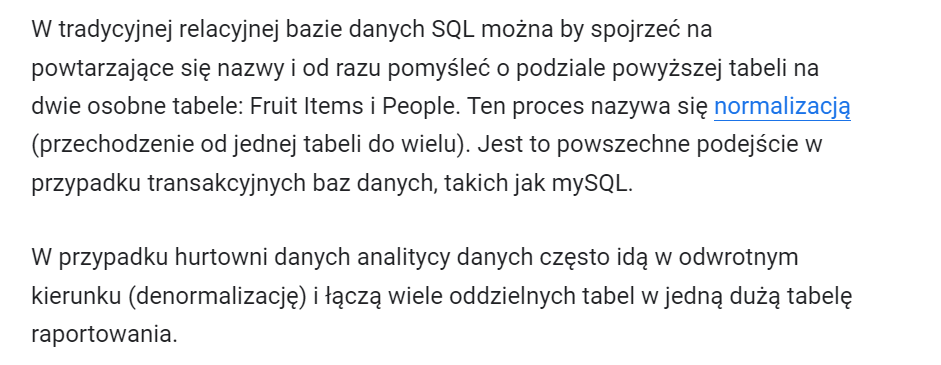

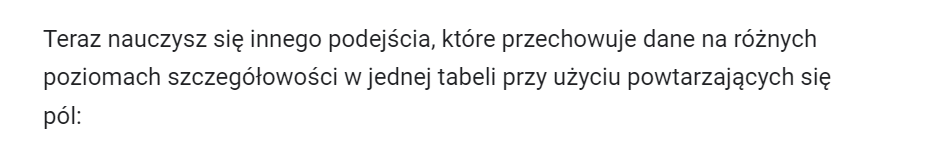

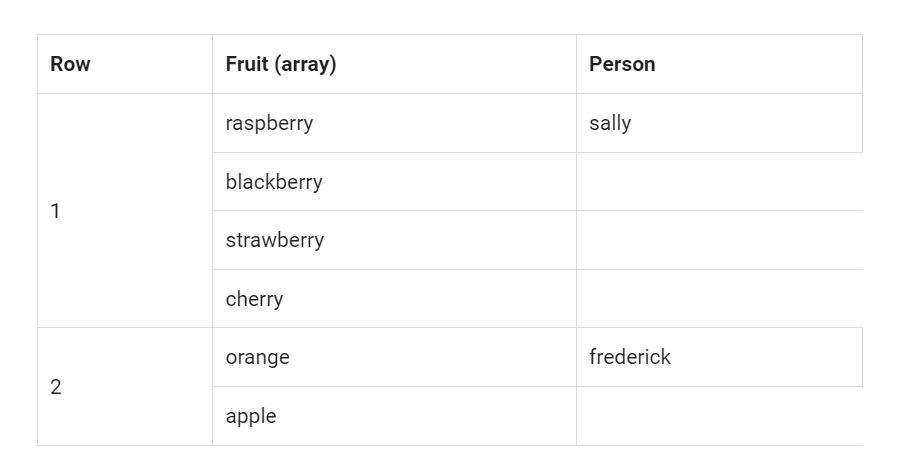

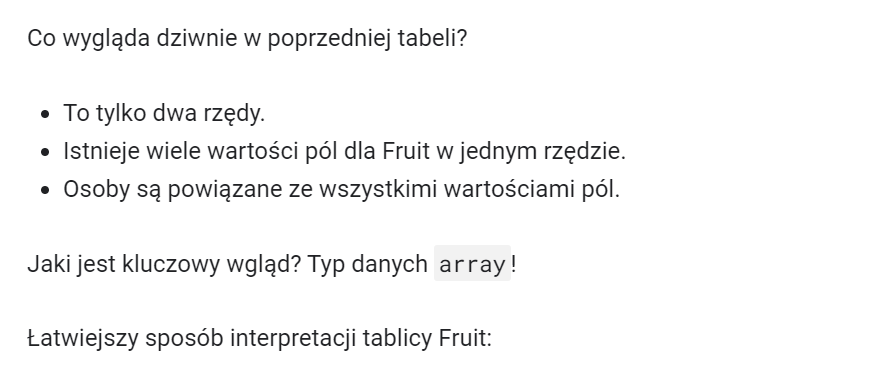

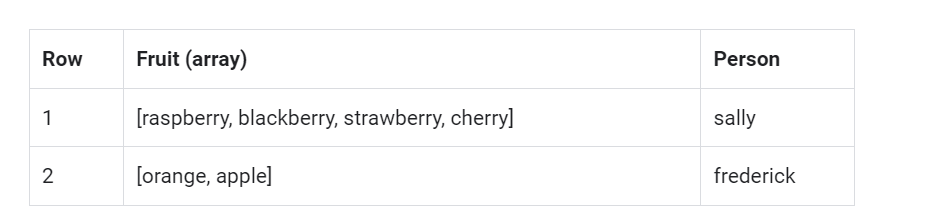

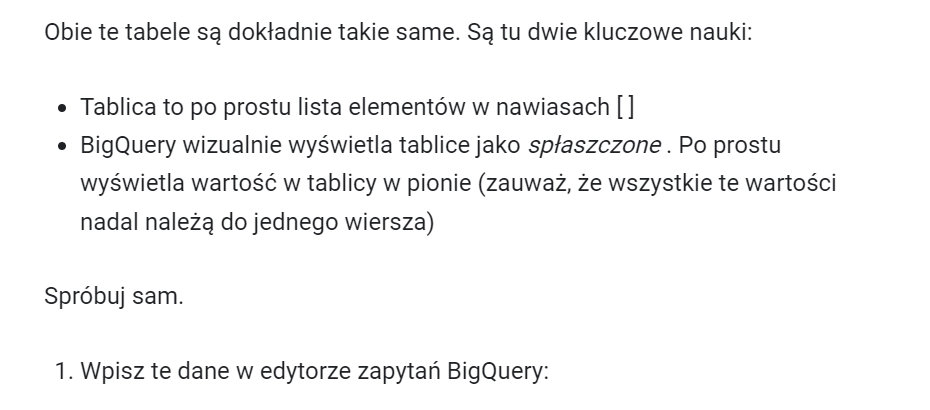

In [ ]:
%%bigquery

#standardSQL
SELECT
['raspberry', 'blackberry', 'strawberry', 'cherry'] AS fruit_array

In [ ]:
%%bigquery

#standardSQL
SELECT
['raspberry', 'blackberry', 'strawberry', 'cherry', 1234567] AS fruit_array

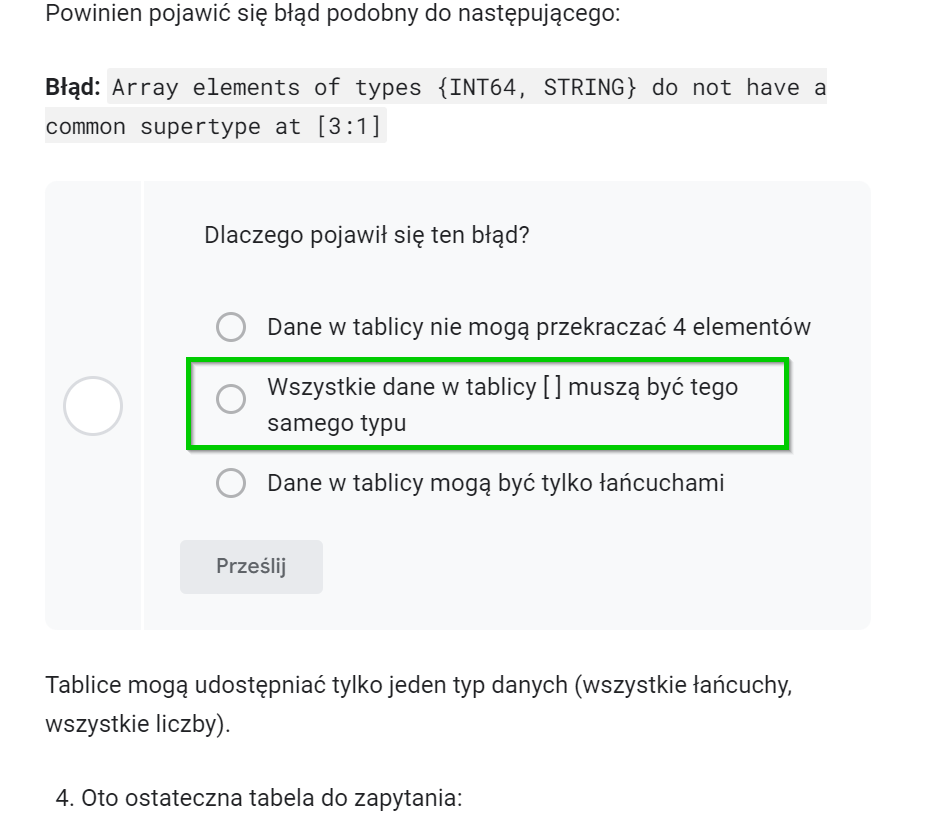

In [ ]:
%%bigquery

#standardSQL
SELECT person, fruit_array, total_cost FROM `data-to-insights.advanced.fruit_store`;

In [ ]:
[{
  "person": ["sally"],
  "fruit_array": ["raspberry", "blackberry", "strawberry", "cherry"],
  "total_cost": ["10.99"]
}, {
  "person": ["frederick"],
  "fruit_array": ["orange", "apple"],
  "total_cost": ["5.55"]
}]

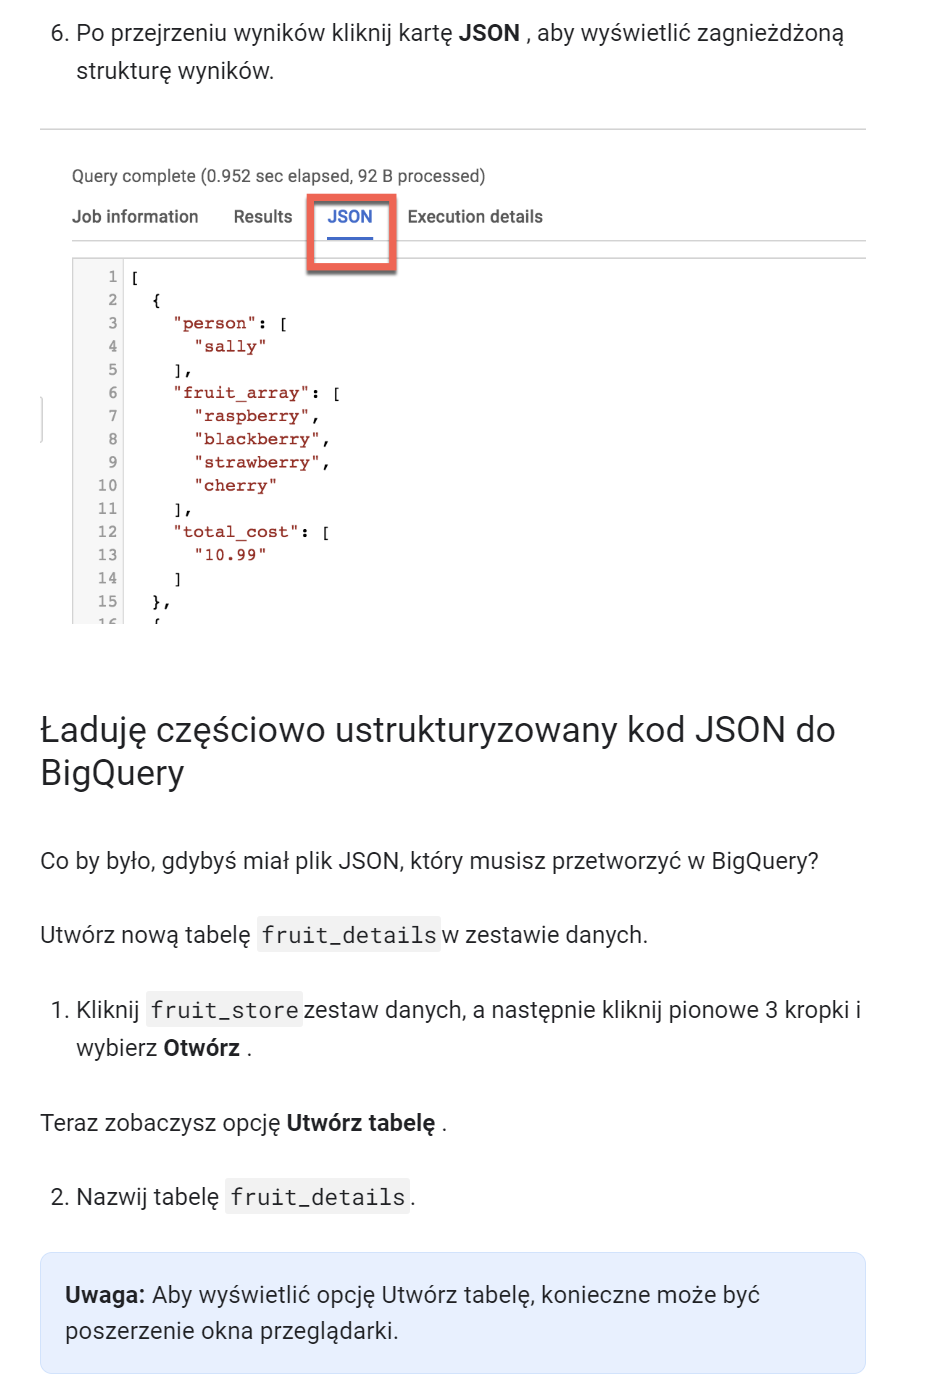

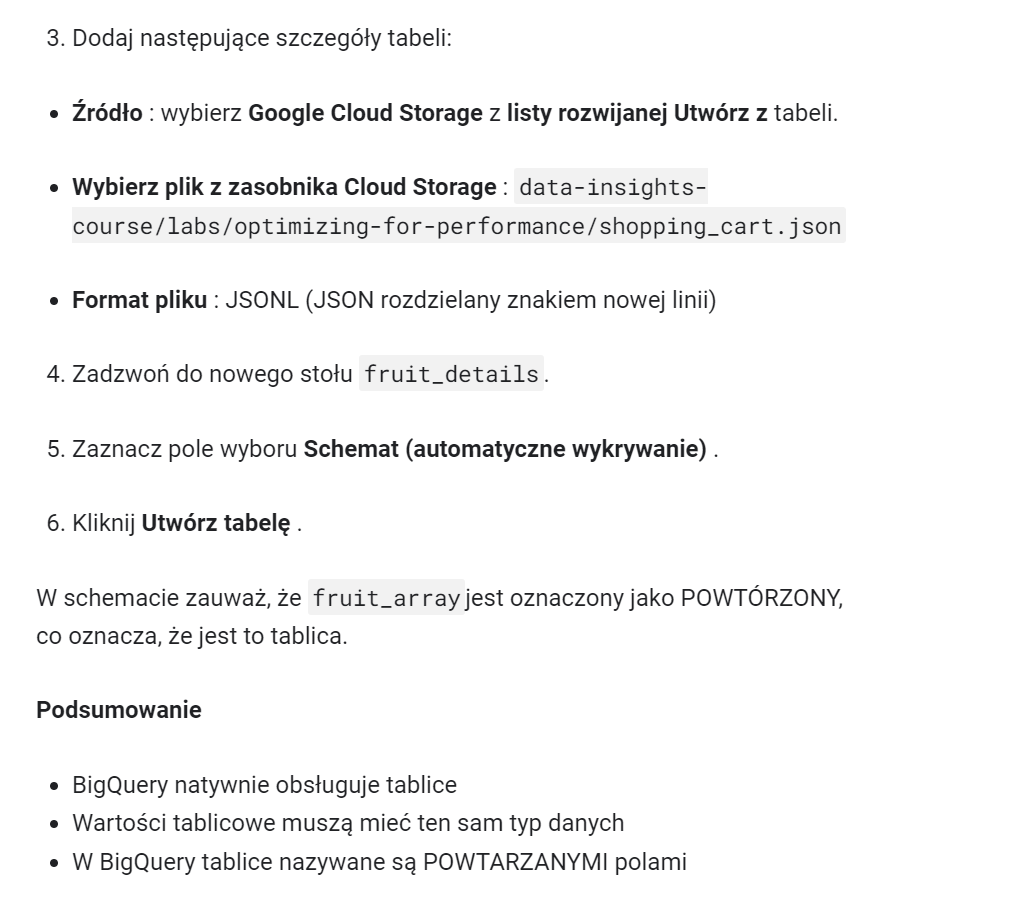

In [ ]:
# data-insights-course/labs/optimizing-for-performance/shopping_cart.json

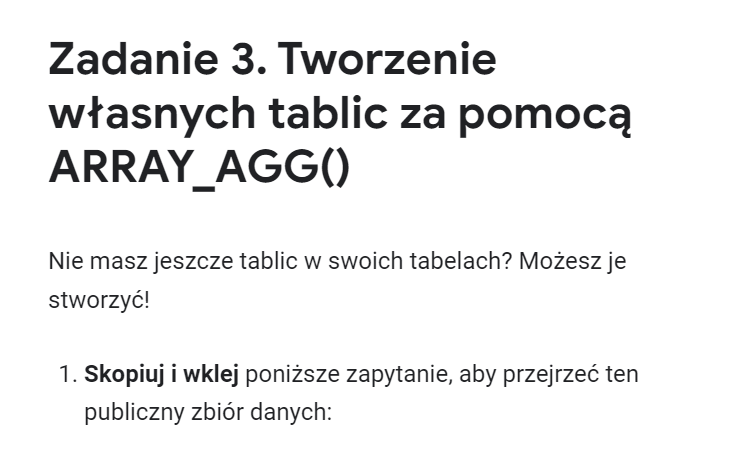

In [ ]:
%%bigquery

SELECT
  fullVisitorId,
  date,
  v2ProductName,
  pageTitle
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
ORDER BY date

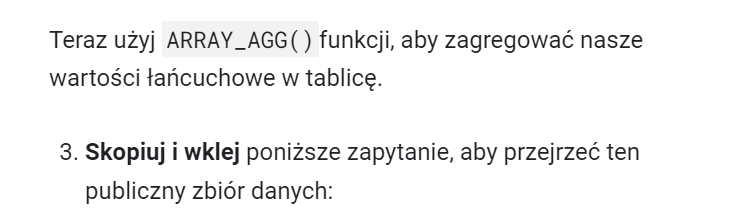

In [ ]:
%%bigquery

SELECT
  fullVisitorId,
  date,
  ARRAY_AGG(v2ProductName) AS products_viewed,
  ARRAY_AGG(pageTitle) AS pages_viewed
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
GROUP BY fullVisitorId, date
ORDER BY date

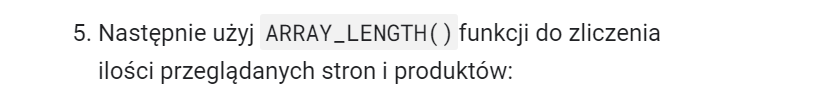

In [ ]:
%%bigquery

SELECT
  fullVisitorId,
  date,
  ARRAY_AGG(v2ProductName) AS products_viewed,
  ARRAY_LENGTH(ARRAY_AGG(v2ProductName)) AS num_products_viewed,
  ARRAY_AGG(pageTitle) AS pages_viewed,
  ARRAY_LENGTH(ARRAY_AGG(pageTitle)) AS num_pages_viewed
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
GROUP BY fullVisitorId, date
ORDER BY date

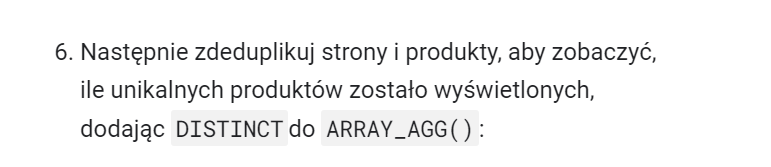

In [ ]:
%%bigquery

SELECT
  fullVisitorId,
  date,
  ARRAY_AGG(DISTINCT v2ProductName) AS products_viewed,
  ARRAY_LENGTH(ARRAY_AGG(DISTINCT v2ProductName)) AS distinct_products_viewed,
  ARRAY_AGG(DISTINCT pageTitle) AS pages_viewed,
  ARRAY_LENGTH(ARRAY_AGG(DISTINCT pageTitle)) AS distinct_pages_viewed
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
GROUP BY fullVisitorId, date
ORDER BY date

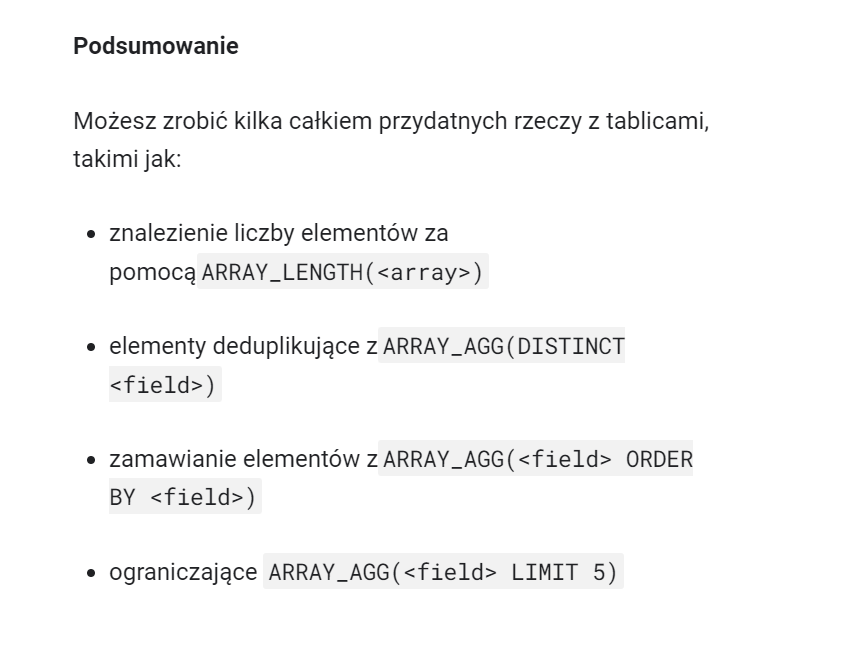

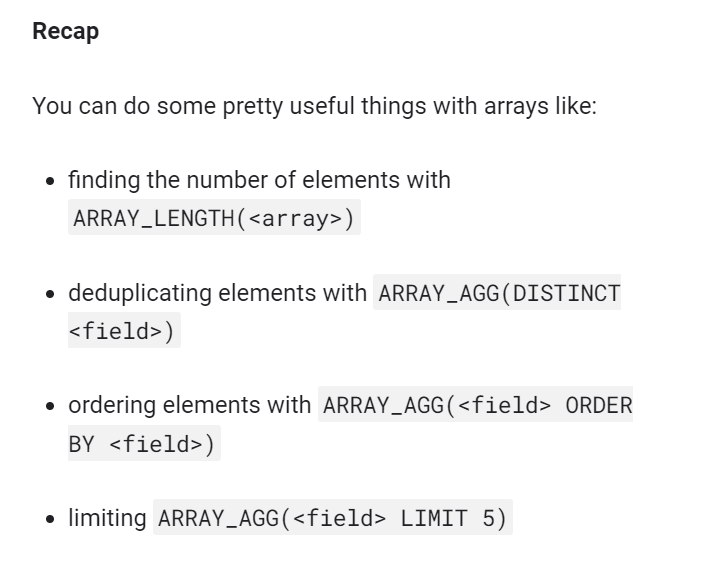

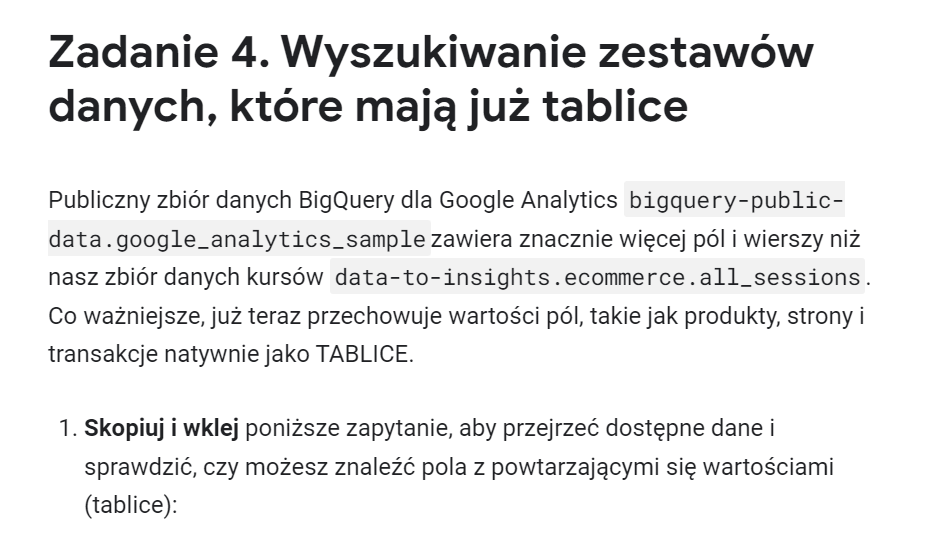

In [ ]:
%%bigquery

SELECT
  *
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE visitId = 1501570398

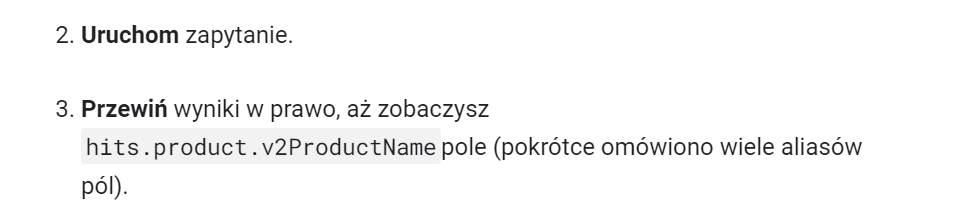

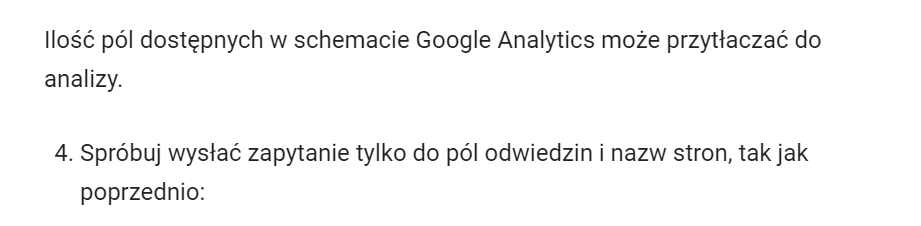

In [ ]:
%%bigquery

SELECT
  visitId,
  hits.page.pageTitle
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE visitId = 1501570398

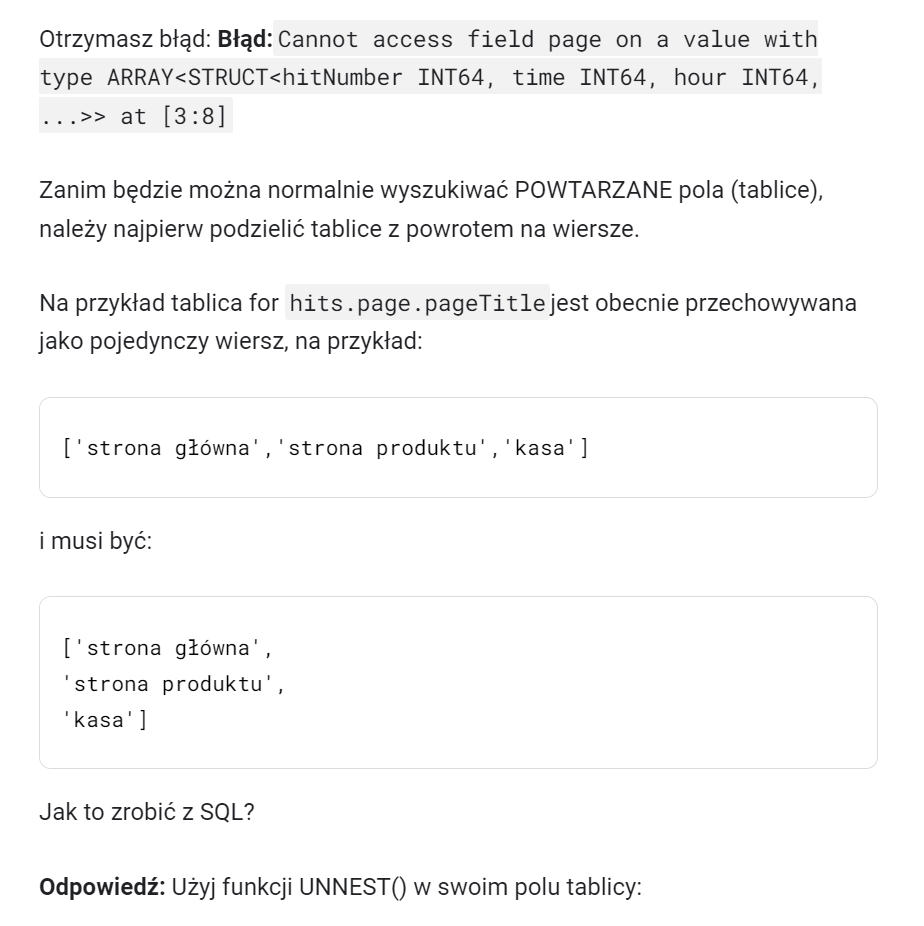

In [ ]:
%%bigquery

SELECT DISTINCT
  visitId,
  h.page.pageTitle
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`,
UNNEST(hits) AS h
WHERE visitId = 1501570398
LIMIT 10

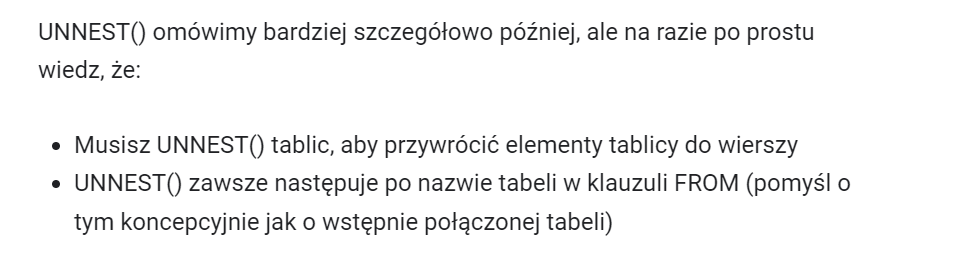

#STRUCT "type": "RECORD"

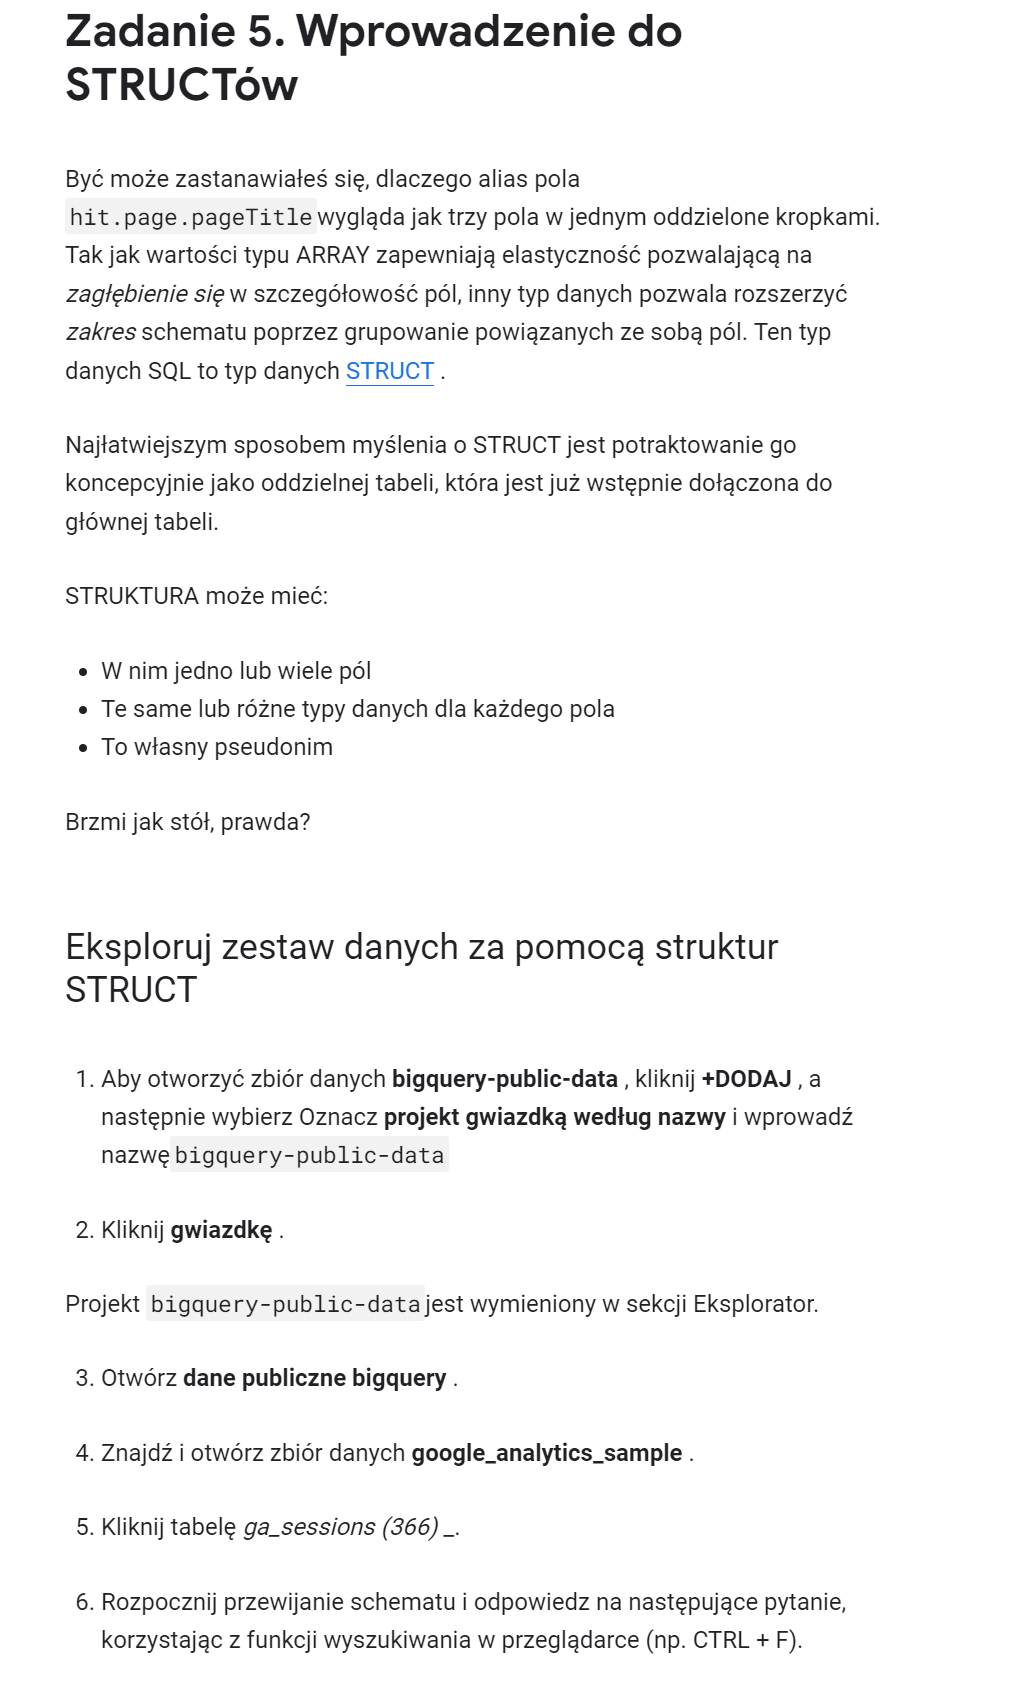

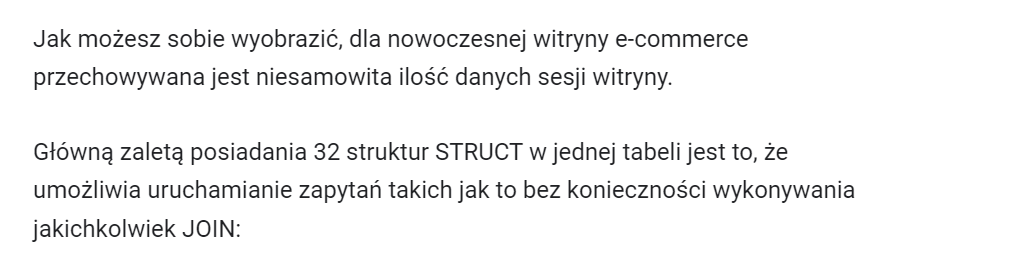

In [ ]:
%%bigquery

SELECT
  visitId,
  totals.*,
  device.*
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE visitId = 1501570398
LIMIT 10

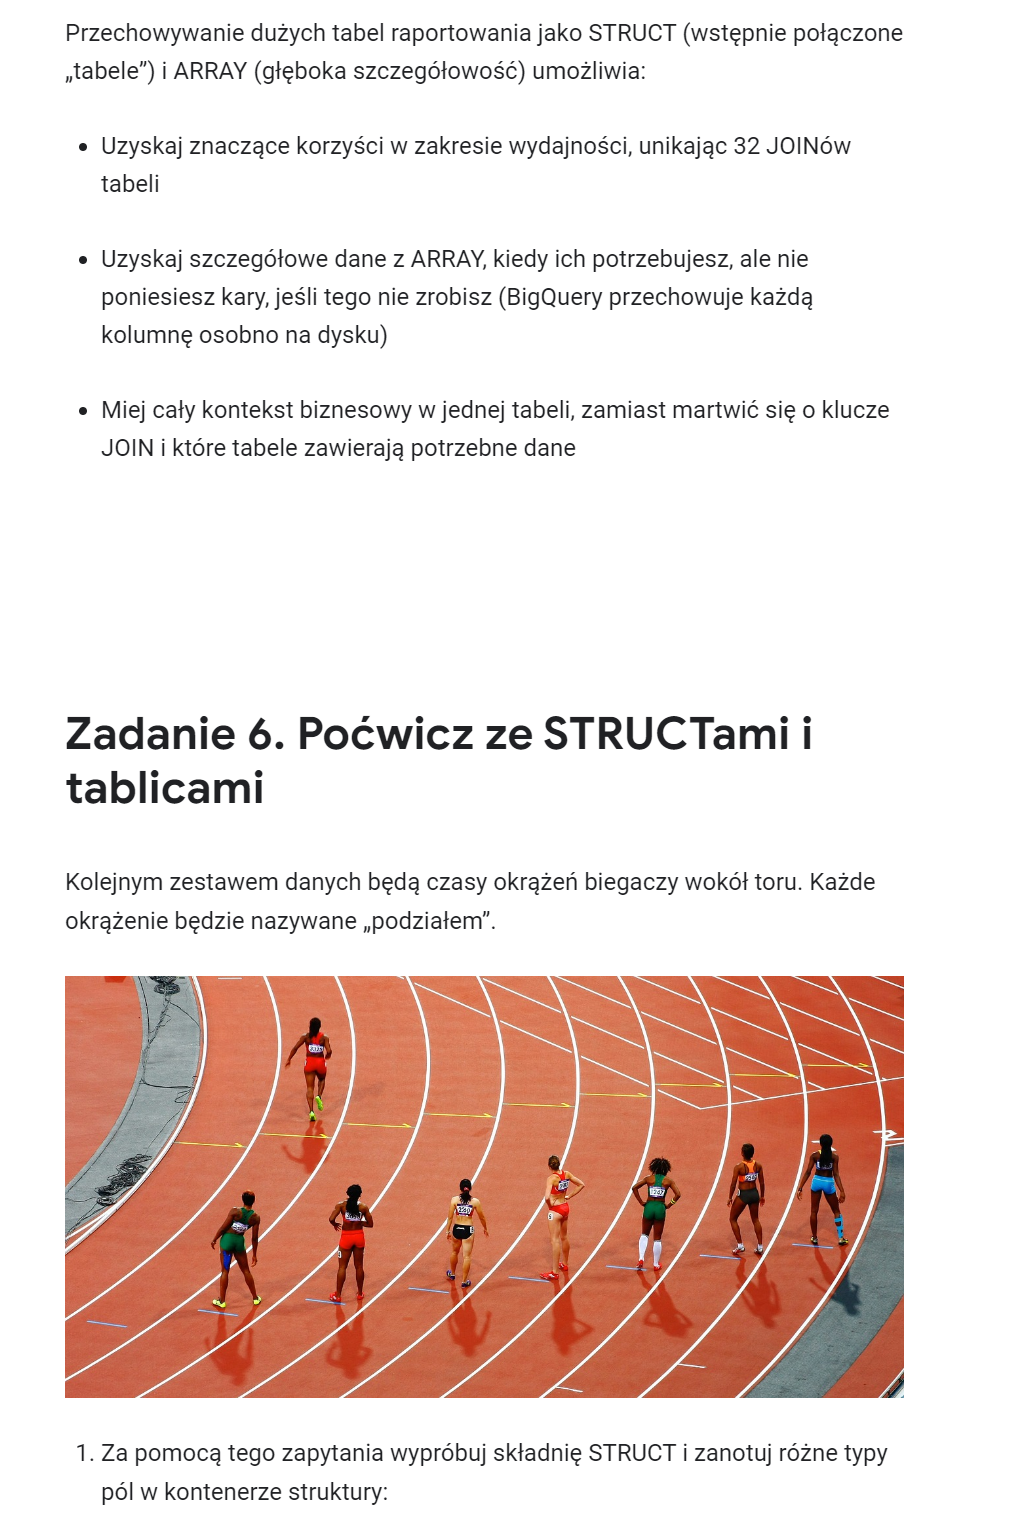

In [ ]:
%%bigquery

#standardSQL
SELECT STRUCT("Rudisha" as name, 23.4 as split) as runner

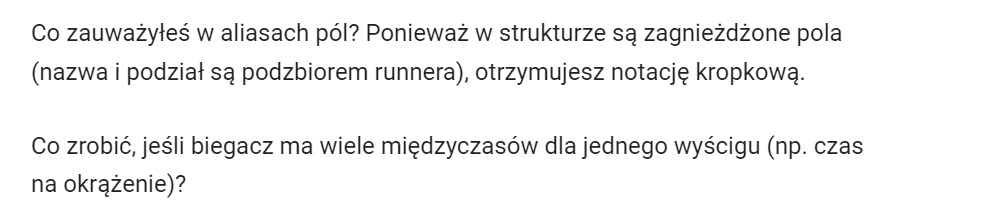

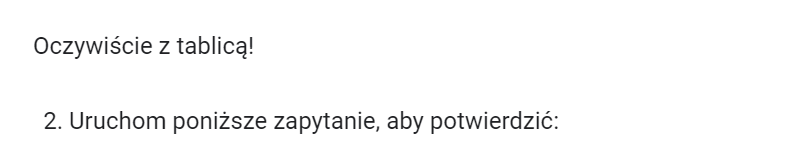

In [ ]:
%%bigquery

#standardSQL
SELECT STRUCT("Rudisha" as name, [23.4, 26.3, 26.4, 26.1] as splits) AS runner

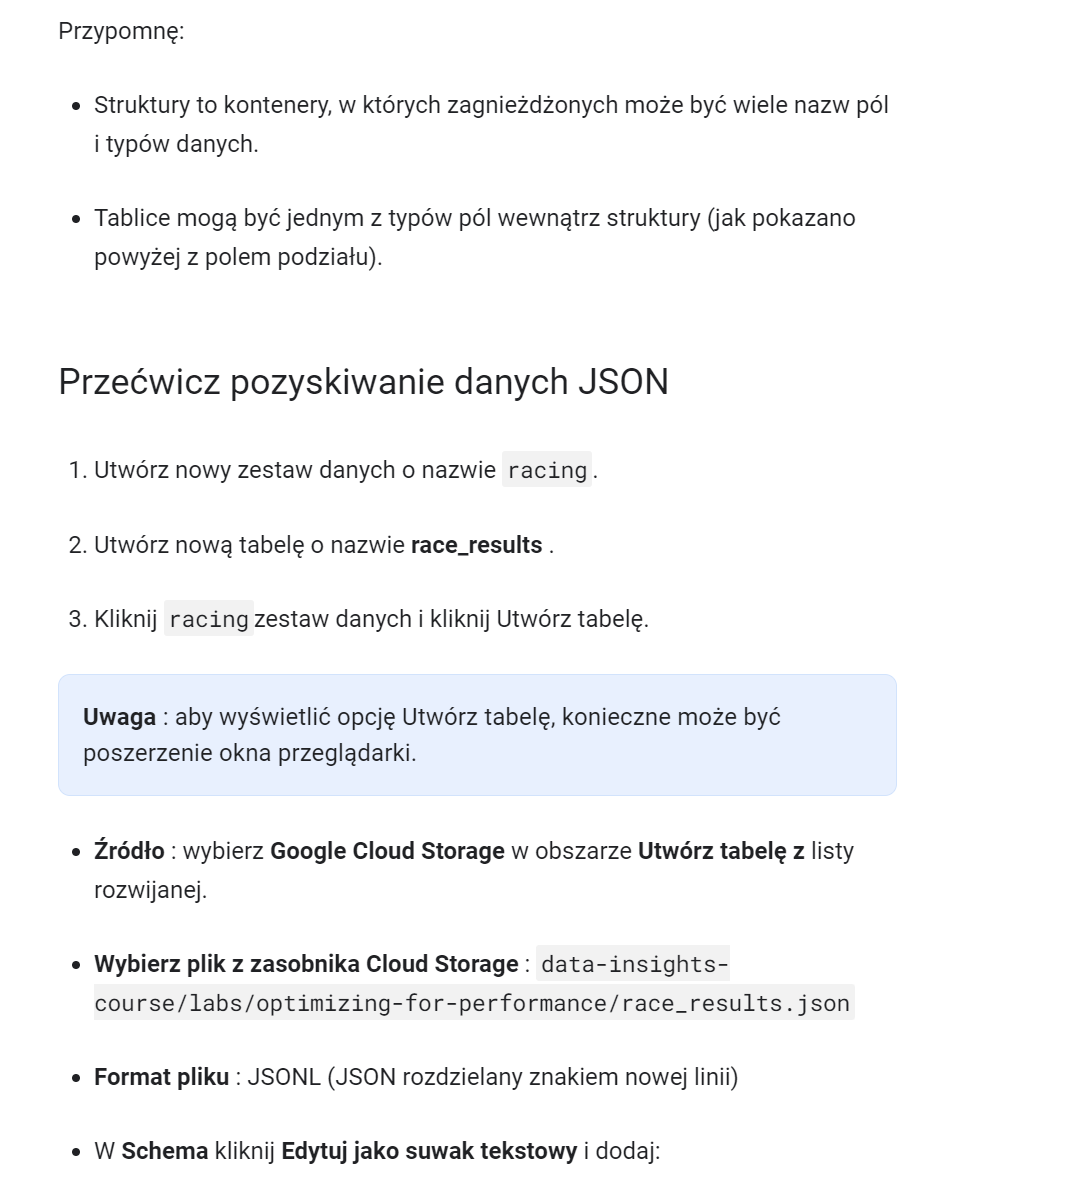

In [ ]:
# data-insights-course/labs/optimizing-for-performance/race_results.json

In [ ]:
[
    {
        "name": "race",
        "type": "STRING",
        "mode": "NULLABLE"
    },
    {
        "name": "participants",
        "type": "RECORD",
        "mode": "REPEATED",
        "fields": [
            {
                "name": "name",
                "type": "STRING",
                "mode": "NULLABLE"
            },
            {
                "name": "splits",
                "type": "FLOAT",
                "mode": "REPEATED"
            }
        ]
    }
]

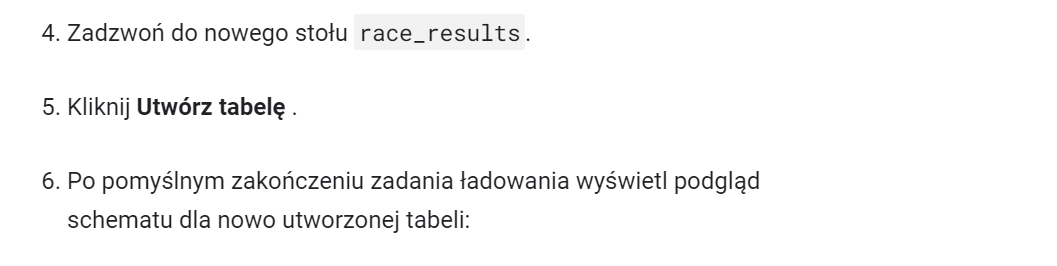

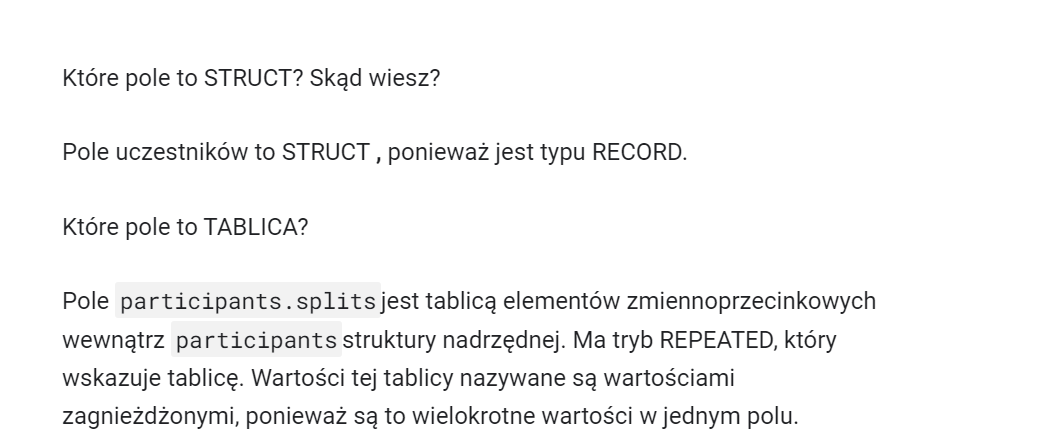

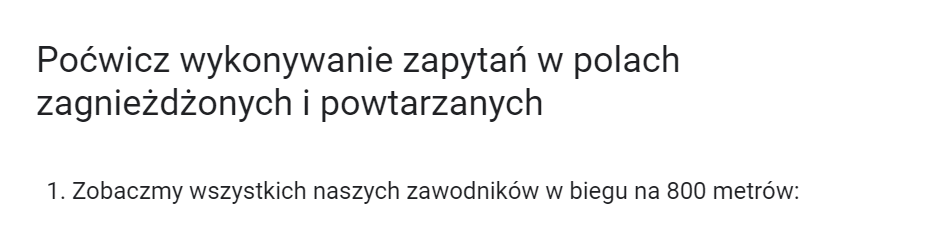

In [ ]:
%%bigquery

#standardSQL
SELECT * FROM racing.race_results

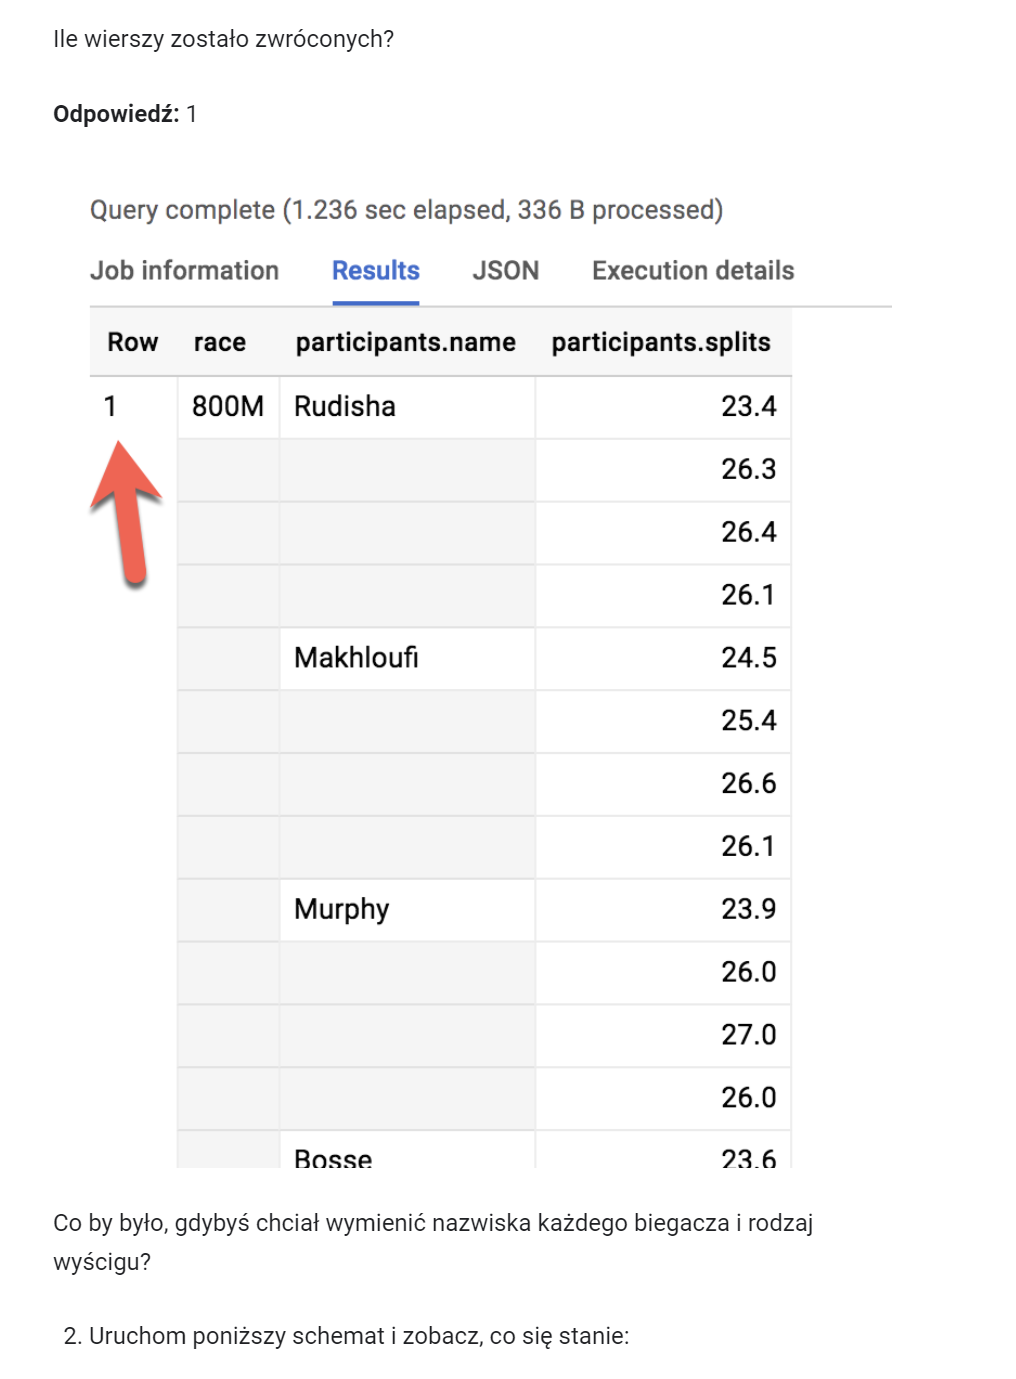

In [ ]:
%%bigquery

#standardSQL
SELECT race, participants.name
FROM racing.race_results

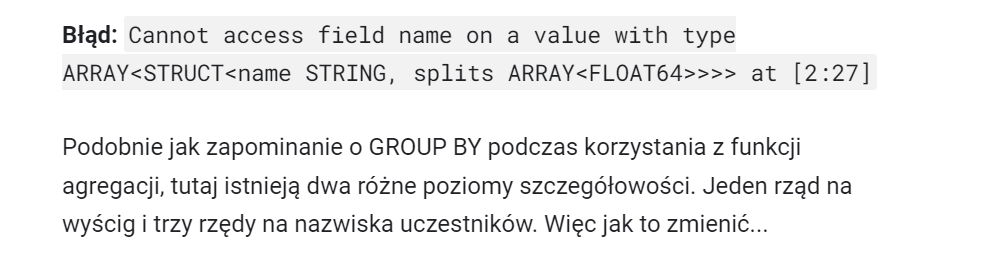

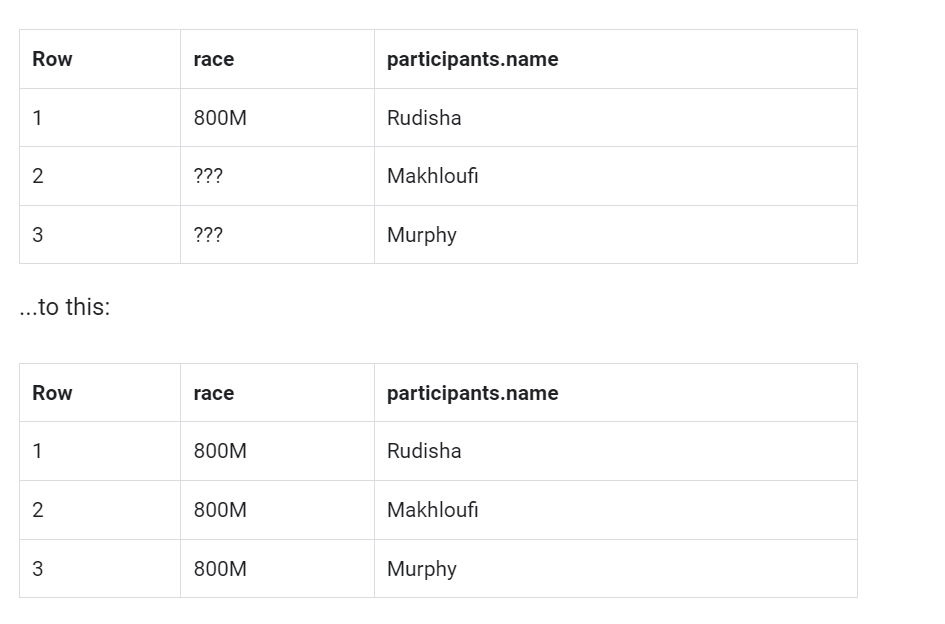

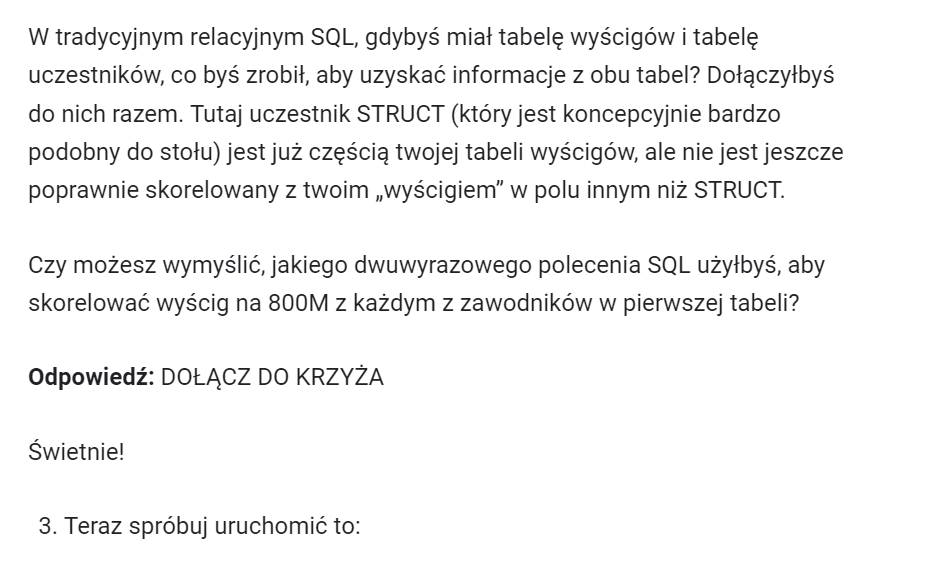

In [ ]:
%%bigquery

#standardSQL
SELECT race, participants.name
FROM racing.race_results
CROSS JOIN
participants  # this is the STRUCT (it is like a table within a table)

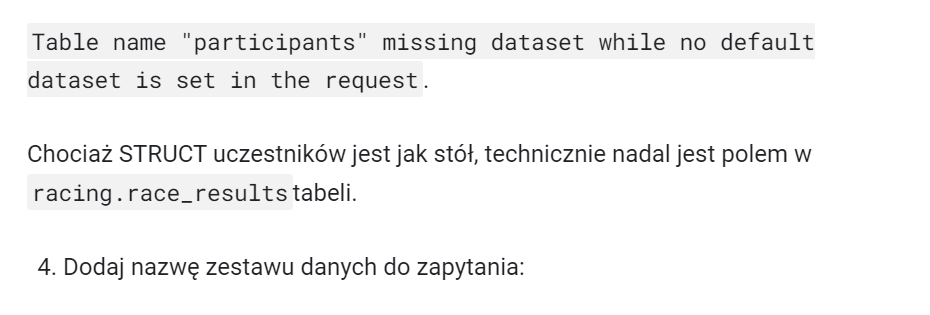

In [ ]:
%%bigquery

#standardSQL
SELECT race, participants.name
FROM racing.race_results
CROSS JOIN
race_results.participants # full STRUCT name

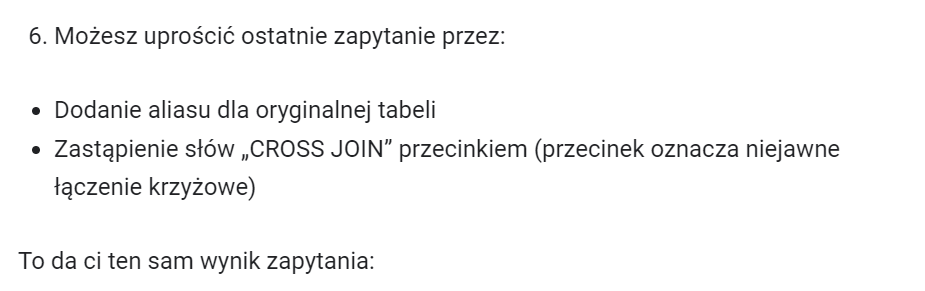

In [ ]:
%%bigquery

#standardSQL
SELECT race, participants.name
FROM racing.race_results AS r, r.participants

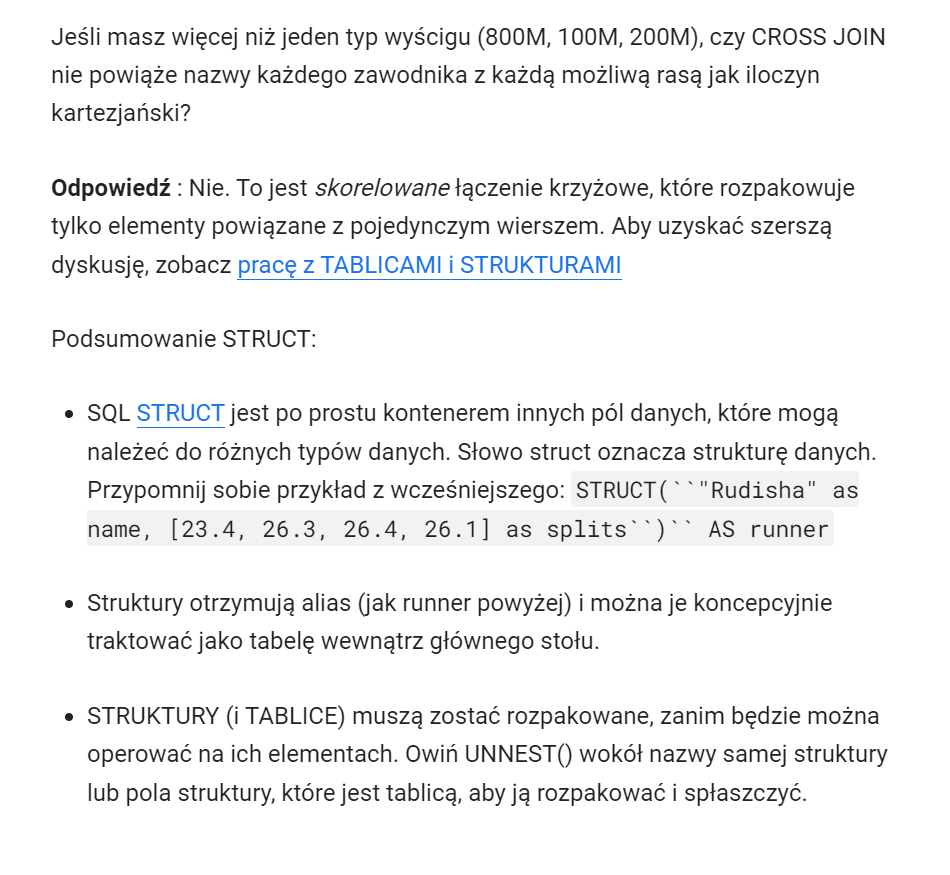

In [ ]:
# https://cloud.google.com/bigquery/docs/arrays#flattening-arrays

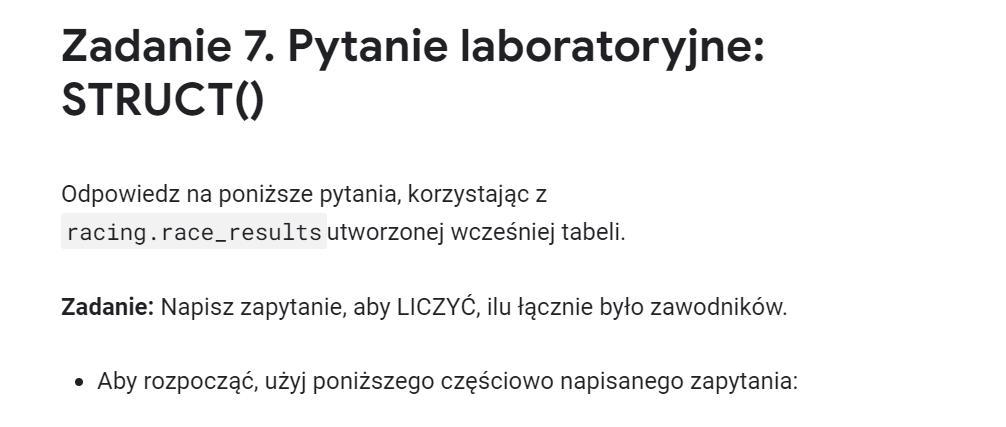

In [ ]:
%%bigquery

#standardSQL
SELECT COUNT(participants.name) AS racer_count
FROM racing.race_results

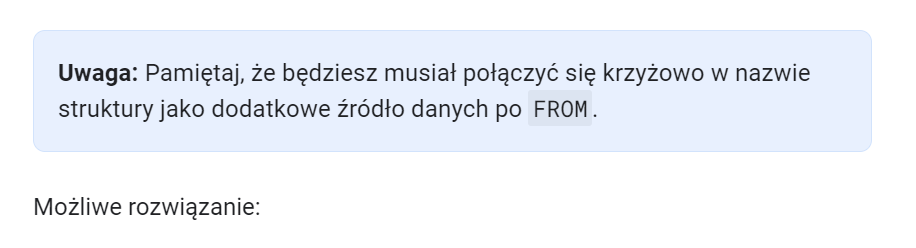

In [ ]:
%%bigquery

#standardSQL
SELECT COUNT(p.name) AS racer_count
FROM racing.race_results AS r, UNNEST(r.participants) AS p

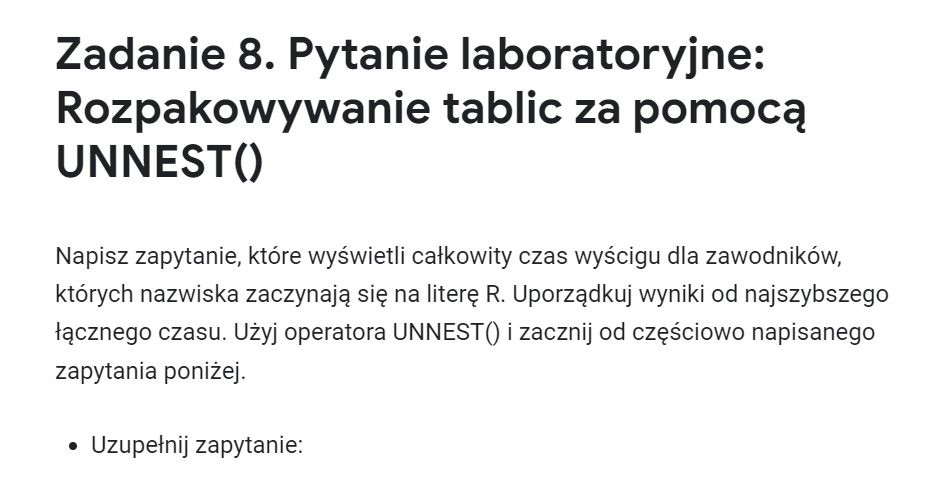

In [ ]:
%%bigquery

#standardSQL
SELECT
  p.name,
  SUM(split_times) as total_race_time
FROM racing.race_results AS r
, r.participants AS p
, p.splits AS split_times
WHERE
GROUP BY
ORDER BY
;

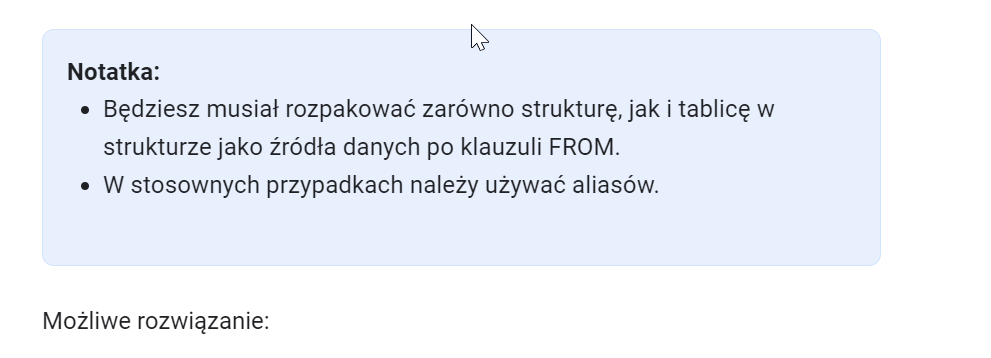

In [ ]:
%%bigquery

#standardSQL
SELECT
  p.name,
  SUM(split_times) as total_race_time
FROM racing.race_results AS r
, UNNEST(r.participants) AS p
, UNNEST(p.splits) AS split_times
WHERE p.name LIKE 'R%'
GROUP BY p.name
ORDER BY total_race_time ASC;

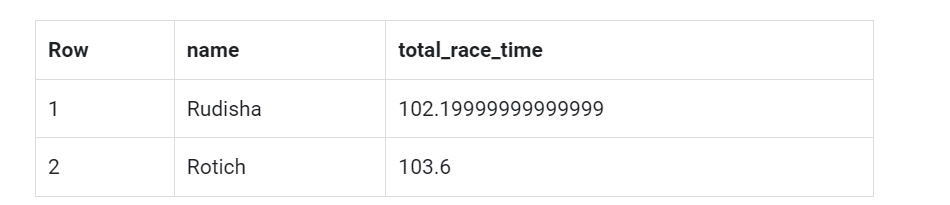

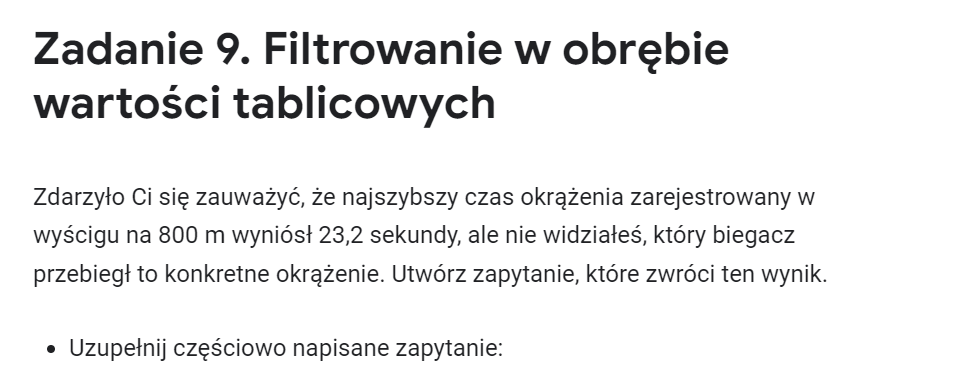

In [ ]:
%%bigquery

#standardSQL
SELECT
  p.name,
  split_time
FROM racing.race_results AS r
, r.participants AS p
, p.splits AS split_time
WHERE split_time = ;

In [ ]:
%%bigquery

#standardSQL
SELECT
  p.name,
  split_time
FROM racing.race_results AS r
, UNNEST(r.participants) AS p
, UNNEST(p.splits) AS split_time
WHERE split_time = 23.2;